In [145]:
# Libraries
from networkx.generators.random_graphs import erdos_renyi_graph, random_regular_graph
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter_ns
import random
from tqdm import tqdm
import igraph as ig
import networkx as nx
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Part 1

How to generate a p-ER random graph

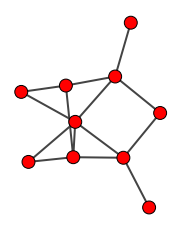

In [137]:
my_graph = ig.Graph.Erdos_Renyi(n = 10, p = .3)
fig, ax = plt.subplots()
ig.plot(my_graph, target=ax)
plt.show()

How to generate a r-regular random graph

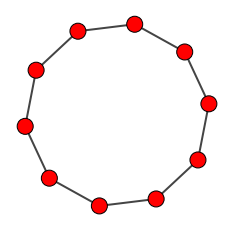

In [143]:
my_graph = ig.Graph.K_Regular(n = 10, k = 2)
fig, ax = plt.subplots()
ig.plot(my_graph, target=ax)
plt.show()

These are the functions that will check if a graph is connected:

In [82]:
def is_connected_algebraic1(graph):

    # Numbers of nodes
    n = graph.vcount()
    # Compute (I+Adj(graph))^(n-1)
    A = np.linalg.matrix_power(np.array(graph.get_adjacency().data,dtype=float) + np.identity(n, dtype = float),n-1)
    return np.all(A>0)

def is_connected_algebraic2(graph):

    #Adjacency matrix
    A = np.array(graph.get_adjacency().data)
    D = np.diag(np.ravel(np.sum(A, axis = 1)))
    # Laplacian matrix
    L = D-A
    eig = np.linalg.eigvalsh(L)

    if len(eig) == 1:
        return False
    else:
        return eig[1] > 0

def is_connected_bfs(graph):

    # Number of nodes
    n = graph.vcount()
    # Choose a random node from the list of nodes
    rnd_choice = random.randint(0,n-1)

    # Try bfs to visit all the nodes
    nodes_crossed = len(graph.bfs(rnd_choice)[0])

    return nodes_crossed == n

Here we set up the simulation functions and the one that will measure time elapsed:

In [95]:
def crono(graph, fun):
    start_time = perf_counter_ns()
    fun(graph)
    return (perf_counter_ns() - start_time)/1000000000

In [125]:
# Simulation parameters
nodes_size = 1000
m = 100
step = 20
m_values = [i for i in range(3,nodes_size+3,step)]

In [100]:
def p_ER_simulation(k,m,prob):

    p_ER_dict = {}

    p_ER_dict['algebraic1'] = []
    p_ER_dict['algebraic2'] = []
    p_ER_dict['BSF'] = []


    for i in tqdm(range(3,k+3,step), colour="CYAN"):

        p_ER_algebraic1_time = 0
        p_ER_algebraic2_time = 0
        p_ER_BSF_time = 0

        for j in range(m):

            p_ER_graph = ig.Graph.Erdos_Renyi(n = i, p = prob)

            p_ER_algebraic1_time += crono(p_ER_graph,is_connected_algebraic1)
            p_ER_algebraic2_time += crono(p_ER_graph, is_connected_algebraic2)
            p_ER_BSF_time += crono(p_ER_graph, is_connected_bfs)


        p_ER_dict['algebraic1'].append(p_ER_algebraic1_time / m)
        p_ER_dict['algebraic2'].append(p_ER_algebraic2_time / m)
        p_ER_dict['BSF'].append(p_ER_BSF_time / m)


    return(p_ER_dict)
def r_regular_simulation(k,m,dim):

    r_regular_dict = {}

    r_regular_dict['algebraic1'] = []
    r_regular_dict['algebraic2'] = []
    r_regular_dict['BSF'] = []

    for i in tqdm(range(3, k+3, step ), colour="CYAN"):

        r_regular_algebraic1_time = 0
        r_regular_algebraic2_time = 0
        r_regular_BSF_time = 0


        for j in range(m):

            r_regular_graph = ig.Graph.K_Regular(n = i, k = dim)

            r_regular_algebraic1_time += (crono(r_regular_graph, is_connected_algebraic1))
            r_regular_algebraic2_time += (crono(r_regular_graph, is_connected_algebraic2))
            r_regular_BSF_time += (crono(r_regular_graph, is_connected_bfs))


        r_regular_dict['algebraic1'].append(r_regular_algebraic1_time/m)
        r_regular_dict['algebraic2'].append(r_regular_algebraic2_time/m)
        r_regular_dict['BSF'].append(r_regular_BSF_time)



    return(r_regular_dict)

In [126]:
p_ER_sim = p_ER_simulation(nodes_size,m,0.2)
r_regular_sim = r_regular_simulation(nodes_size,m,2)

100%|██████████| 50/50 [05:46<00:00,  6.94s/it]


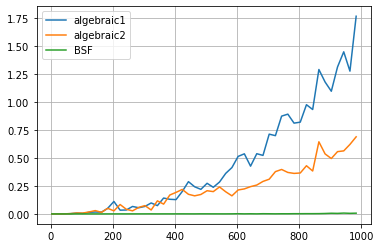

In [133]:
plt.plot(m_values,p_ER_sim["algebraic1"],label="algebraic1")
plt.plot(m_values,p_ER_sim["algebraic2"],label = "algebraic2")
plt.plot(m_values,p_ER_sim["BSF"],label = "BSF")
plt.legend()
plt.grid()
plt.show()

In [132]:
for i in tqdm(range(M)):  # Loop over nodes and probabilìty (little hack)

    probs_er = []   # Pre-set the estimated probability for ER - graph
    probs_r_2 = []  # Pre-set the estimated probability for RR_2 - graph
    probs_r_8 = []  # Pre-set the estimated probability for RR-8 - graph

    for x in sim_size:
        # Estimated the probabilty for ER - graph  to be connected
        probs_er.append(sum([nx.is_connected(erdos_renyi_graph(n = 100, p =  i / 100)) for _ in range(M)] / M))
        # Estimated the probabilty for RR 2 - graph  to be connected
        probs_r_2.append(sum([(nx.is_connected(random_regular_graph(n = i+3, d=2))) for _ in range(M)]) / M)
        # Estimated the probabilty for RR8 - graph  to be connected
        probs_r_8.append(sum([(nx.is_connected(random_regular_graph(n = i+9, d=8))) for _ in range(M)]) / M)

    # Get the mean of the estemated probabilies
    estimate_p['p_ER'].append(np.mean(probs_er))
    estimate_p['r_regular_2'].append(np.mean(probs_r_2))
    estimate_p['r_regular_8'].append(np.mean(probs_r_8))

    # Get the quantile of the probabilities distributions
    quantile['p_ER_L'].append(np.quantile(probs_er , q = 0.025))
    quantile['p_ER_U'].append(np.quantile(probs_er , q = 0.975))

    quantile['r_regular_2_L'].append(np.quantile(probs_r_2 , q = 0.025))
    quantile['r_regular_2_U'].append(np.quantile(probs_r_2 , q = 0.975))

    quantile['r_regular_8_L'].append(np.quantile(probs_r_8 , q = 0.025))
    quantile['r_regular_8_U'].append(np.quantile(probs_r_8 , q = 0.975))


# Transoform into csv file
pd.DataFrame.from_dict(estimate_p).to_csv("estimate_p.csv")   
pd.DataFrame.from_dict(quantile).to_csv('quantile.csv')
percentili = pd.read_csv("quantile.csv")
estimated_p = pd.read_csv("estimate_p.csv")

100%|██████████| 100/100 [49:51<00:00, 29.91s/it]


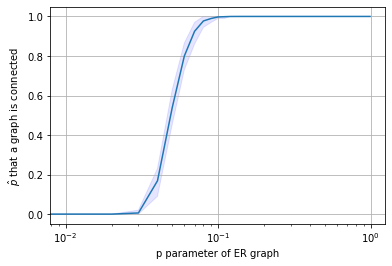

In [ ]:
fig, ax = plt.subplots()
ax.plot([i / 100 for i in range(100) ],estimated_p['p_ER'])
ax.fill_between([i / 100 for i in range(100)], percentili['p_ER_L'] , percentili['p_ER_U'], color='b', alpha=.1)
ax.grid()
plt.xlabel('p parameter of ER graph')
plt.ylabel(r'$\hat{p}$ that a graph is connected')
plt.xscale('log')

Text(0, 0.5, '$\\hat{p}$ that a graph is connected')

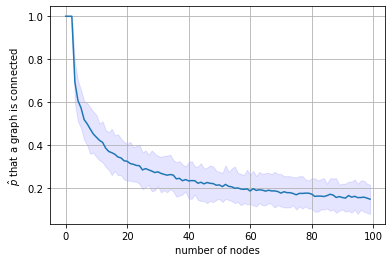

In [ ]:
fig, ax = plt.subplots()
ax.plot([i  for i in range(100) ],estimated_p['r_regular_2'])
ax.fill_between([i for i in range(100)], percentili['r_regular_2_L'] , percentili['r_regular_2_U'], color='b', alpha=.1)
ax.grid()
plt.xlabel('number of nodes')
plt.ylabel(r'$\hat{p}$ that a graph is connected')


Text(0, 0.5, '$\\hat{p}$ that a graph is connected')

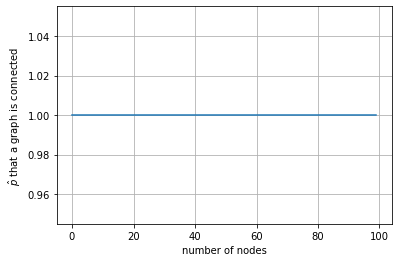

In [ ]:
fig, ax = plt.subplots()
ax.plot([i  for i in range(100) ],estimated_p['r_regular_8'])
ax.fill_between([i for i in range(100)], percentili['r_regular_8_L'] , percentili['r_regular_8_U'], color='b', alpha=.1)
ax.grid()
plt.xlabel('number of nodes')
plt.ylabel(r'$\hat{p}$ that a graph is connected')


PART 2

In [93]:
#Parameters
c = 10       #Gbyte/s
data = 32000 #Gbyte
eps = 0.1
E_x = 28800  #Seconds
T0 = 30      #Seconds
tau = 0.000006
f = 48/1500
n = 64
server_size = 10000
simulation_size = 100

In [94]:
def ft_hop_count( N, k = n ):

    if N > (k*k*k)/4:
        raise ValueError

    # Set up a list of servers
    hops = np.zeros(N)

    # Same edge switch (first n/2 servers)
    hops[0:int(k/2)] = 2

    # Same pod
    hops[int(k/2):(int(k/2)*int(k/2))] = 4

    # Everything else goes to 6
    hops[int(k/2)*int(k/2):] = 6

    return hops

def jf_hop_count(N, k = n ):
    # This function works because N << 24000

    if N > (k*k*k)/4:
        raise ValueError

    # Set up a list of servers
    hops = np.zeros(N)

    # Same edge switch (first n/2 servers)
    hops[0:int(k/2)] = 2

    # Same pod
    hops[int(k/2):(int(k/2)*int(k/2))] = 3

    # Everything else (in our case goes to 4...)
    hops[int(k/2)*int(k/2):] = 4

    return hops

In [95]:
def transmission_time( data, hops, tau = tau, C = c ):

    headed_data = data + f*data

    inverse_T = np.array([1/(2 * tau * h) for h in hops])

    thetas = (C /sum(inverse_T)) * inverse_T

    return headed_data / thetas

In [96]:
# Splitting data in N subtasks
def split_data( N, L0 ):
    return np.repeat(L0/N, N)
# Generating output data from a uniform
def job_data( N, L0 ):
    return np.random.uniform(0, 2*L0/N, size=N)

In [97]:
# Time to execute the job
def job_time( N, T0 = T0, E_x = E_x ):
    return np.random.exponential(E_x/N, size = N) + T0

In [98]:
# Final function
def response_time( N, fun, L0 = data ):
    hops = fun(N)
    input_data = split_data(N, L0)
    output_data = job_data(N, L0)

    times = job_time(N)+\
            transmission_time(input_data, hops) + \
            transmission_time(output_data, hops)

    return max(times)

In [99]:
# Monte-Carlo simulation
def mc_sim( n, M, fun ):

    results = {}
    response_times = np.zeros(n)
    job_times = np.zeros(n)

    for i in tqdm(range(n)):

        vec1 = 0
        vec2 = 0

        for j in range(M):

            vec1 +=  response_time(i+1,fun)
            vec2 += sum(job_time(i+1))

        response_times[i] = vec1/M
        job_times[i] = vec2/M


    results["avg_response_times"] = response_times
    results["avg_job_times"] = job_times

    return(results)


In [181]:
ft_sim = mc_sim(server_size,simulation_size,ft_hop_count)
jf_sim = mc_sim(server_size,simulation_size,jf_hop_count)

In [225]:
ft_avg_response_times = ft_sim["avg_response_times"] / (E_x +T0)
jf_avg_response_times = jf_sim["avg_response_times"] / (E_x +T0)
ft_job_running_cost = (ft_sim["avg_response_times"] +  eps * ft_sim["avg_job_times"]) / (E_x +T0)
jf_job_running_cost = (jf_sim["avg_response_times"] +  eps * jf_sim["avg_job_times"]) / (E_x +T0)


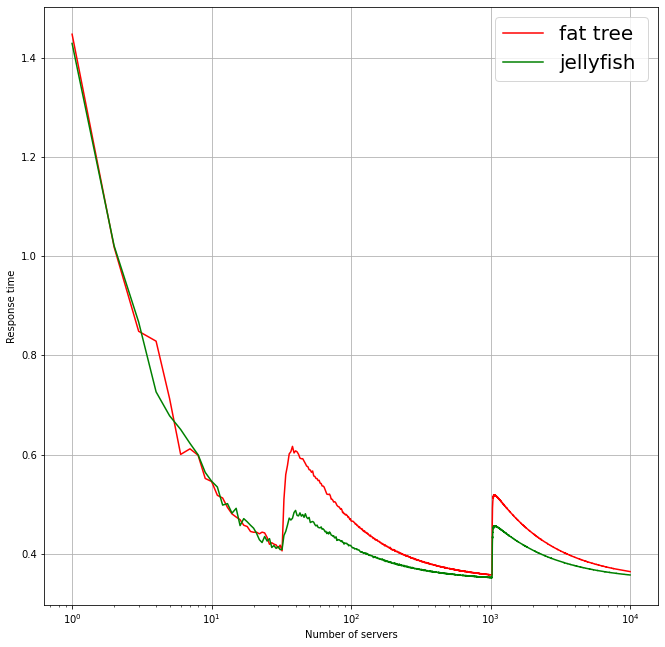

In [100]:
# Average response time plot
fig, ax = plt.subplots(figsize=[11, 11])
plt.plot([i+1 for i in range(server_size)],ft_avg_response_times,color = "red",label = "fat tree ")
plt.plot([i+1  for i in range(server_size)],jf_avg_response_times, color = "green",label = "jellyfish")
plt.xlabel("Number of servers")
plt.ylabel("Response time")
plt.legend(fontsize="20")
plt.xscale("log")
plt.grid()
plt.show()

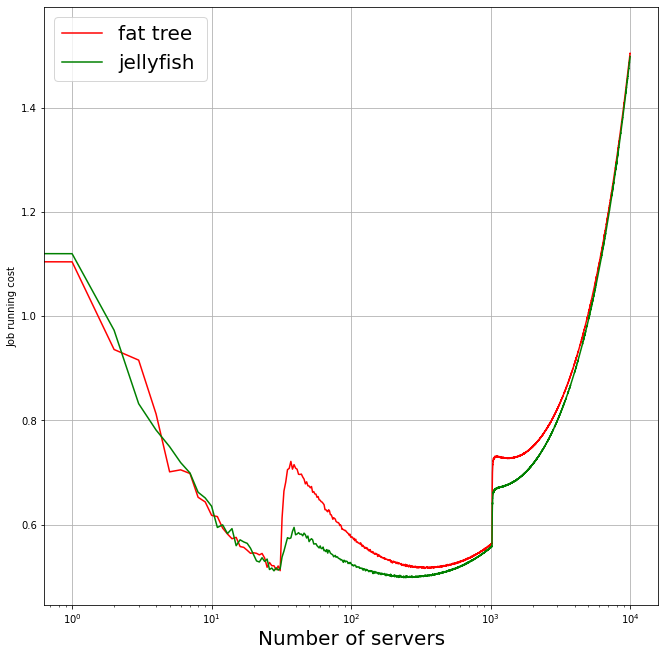

In [133]:
# JOB RUNNING COST PLOT
fig, ax = plt.subplots(figsize=[11, 11])
plt.plot(ft_job_running_cost,color = "red",label = "fat tree ")
plt.plot(jf_job_running_cost, color = "green",label = "jellyfish")
plt.xlabel("Number of servers", fontsize="20")
plt.ylabel("Job running cost")
plt.grid()
plt.legend(fontsize="20")
plt.xscale("log")

plt.show()

In [ ]:
# Here we simulate the number of 4-distance nodes from a fixed one
four_distance = np.zeros(5000)
for  i in tqdm(range(5000)):
    r_regular_graph = nx.random_regular_graph(32,2048)
    four_distance[i] = (len(nx.descendants_at_distance(r_regular_graph, 1, 2))-32)*32

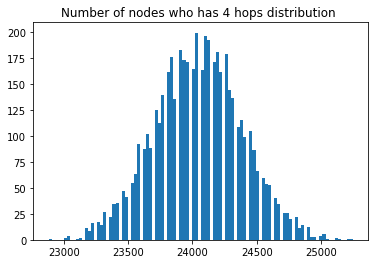

In [64]:
plt.hist(four_distance,100)
plt.title("Number of nodes who has 4 hops distribution ")
plt.show()